In [19]:
from cobra.io import read_sbml_model
from cobra import Metabolite, Reaction
import cobra
from collections.abc import Mapping
from cameo.strain_design import OptGene
from cameo import models
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo import phenotypic_phase_plane
from cameo.strain_design.heuristic.evolutionary_based import OptGene
from cameo.strain_design import OptKnock
from cameo.strain_design.heuristic.evolutionary_based import CofactorSwapOptimization
from cameo.strain_design.heuristic.evolutionary.objective_functions import product_yield
from cameo.strain_design.heuristic.evolutionary.optimization import CofactorSwapOptimization, NADH_NADPH
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from pytest import approx
from matplotlib import pyplot as plt
import numpy as np
model = read_sbml_model('iUMN146_1321.xml')

## Metabolites, Reactions and Enzymes to be added in model
***

- Hexanoyl-coA (HcoA) - C27H46N7O17P3S - in model
- Olivetolic Acid (OA) - C12H16O4 - add
- (IPP) Isopentenyl pyrophosphate (IPP, isopentenyl diphosphate, or IDP) - 	C5H12O7P2 - in model
- Dimethylallyl pyrophosphate (DMAPP) -  C5H12O7P2 - add
- Geranyl diphosphate (GPP) - C10H20O7P2 - in model 
- Cannabigerolic acid (CBGA) - C22H32O4 - add
- Tetrahydrocannabinolic acid (THCA) - C22H30O4 -add
- Malonyl_CoA  - in model

Reactions 

- Hexanoyl-coA + 3 malonyl-CoA -> Olivetoic acid (OA)                                                    (1) OLS
- Dimethylallyl diphosphate (DMAPP) + IPP -> Geranyl diphosphate (GPP)       (2) GPPS
- Geranyldiphosphate (GPP) + Olivetolic acid (OA) -> cannabigerolic acid (CBGA)                          (3) CBGAS
- cannabigerolic acid (CBGA) -> Tetrahydrocannabinolic acid (THCA)                                       (4) THCAS
- Tetrahydrocannabinolic acid (THCA) ->                                             (5) Export
-  IPP -> DMPP                                                                       (6) evenwicht

Enzymes
- Olivetol synthase (OLS)        Gene:   OC115699293
- Olivetolic acid cyclase (OAC)  Gene:   OC115723438 
- CBGA synthase (CBGAS)          Gene:   PT4-T
- THCA synthase (THCAS) 	     Gene:   SAPIO_CDS2003
- GPP synthase (GPPS)            Gene:   ERG20 (S. cerevisiea)
- Isopentenyl-diphosphate isomerase Gene: fcd1 (Solanum lycopersicum)
***

In [20]:
for metabolite in model.metabolites:
    print (f'{metabolite.name} , {metabolite.id}')


Phosphatidylethanolamine (dihexadec-9enoyl, n-C16:1) , pe161_c
DCTP C9H12N3O13P3 , dctp_c
Phosphatidylglycerol (dihexadecanoyl, n-C16:0) , pg160_p
GTP C10H12N5O14P3 , gtp_c
Protoheme C34H30FeN4O4 , pheme_c
L-Glutamine , gln__L_c
Nicotinamide adenine dinucleotide - reduced , nadh_c
Phosphate , pi_c
5,6,7,8-Tetrahydrofolate , thf_c
Copper , cu2_c
Putrescine , ptrc_c
L-Isoleucine , ile__L_c
Nicotinamide adenine dinucleotide phosphate , nadp_c
Biotin , btn_c
Calcium , ca2_c
L-Tryptophan , trp__L_c
5-Methyltetrahydrofolate , 5mthf_c
Glycogen C6H10O5 , glycogen_c
Sulfate , so4_c
[4Fe-4S] iron-sulfur cluster , 4fe4s_c
Thiamine diphosphate , thmpp_c
Coenzyme A , coa_c
Ubiquinol-8 , q8h2_c
L-Lysine , lys__L_c
Siroheme C42H36FeN4O16 , sheme_c
Phosphatidylethanolamine (dioctadec-11-enoyl, n-C18:1) , pe181_p
P-Cresol , 4crsol_c
Two disacharide linked murein units, tetrapeptide corsslinked tetrapeptide (A2pm->D-ala) (middle of chain) , murein4px4p_p
DATP C10H12N5O12P3 , datp_c
Ammonium , nh4_c
5'-d

In [21]:
model.metabolites.g1p_e

<Metabolite g1p_e at 0x214ecec2b80>

In [22]:
model.reactions.G1Ptex

<Reaction G1Ptex at 0x214eead5d90>

***
### Adding the metabolites
***

In [23]:
olivetolic_acid = cobra.core.Metabolite(id = 'OA', formula = 'C12H16O4', name = 'Olivetolic Acid', charge = 0, compartment = 'c')
dmapp = cobra.core.Metabolite(id = 'DMAPP', formula = 'C5H12O7P2', name = 'Dimethylallyl diphosphate', charge = 0, compartment = 'c')
cannabigerolic_acid= cobra.core.Metabolite(id = 'CBGA', formula = 'C22H32O4', name = 'Cannabigerolic Acid', charge = 0, compartment = 'c')
tetrahydrocannabinolic_acid  = cobra.core.Metabolite(id = 'THCA', formula = 'C22H30O4', name = 'Tetrahydrocannabinolic acidt', charge = 0, compartment ='c')

hexanoyl_coA =model.metabolites.get_by_id('hxcoa_c')
malonyl_CoA = model.metabolites.get_by_id('malcoa_c')
isopentenyl = model.metabolites.get_by_id('ipdp_c')
geranyl = model.metabolites.get_by_id('grdp_c')


model.add_metabolites(olivetolic_acid)
model.add_metabolites(dmapp)
model.add_metabolites(cannabigerolic_acid)
model.add_metabolites(tetrahydrocannabinolic_acid)

print(str(model.metabolites))


[<Metabolite pe161_c at 0x214ecedfaf0>, <Metabolite dctp_c at 0x214ecedfb20>, <Metabolite pg160_p at 0x214ecedfa90>, <Metabolite gtp_c at 0x214ecedf880>, <Metabolite pheme_c at 0x214ecedf7c0>, <Metabolite gln__L_c at 0x214ecedf820>, <Metabolite nadh_c at 0x214ecedfa60>, <Metabolite pi_c at 0x214ecedf850>, <Metabolite thf_c at 0x214ecedf790>, <Metabolite cu2_c at 0x214ecedf760>, <Metabolite ptrc_c at 0x214ecedf730>, <Metabolite ile__L_c at 0x214ecedf700>, <Metabolite nadp_c at 0x214ecedf6d0>, <Metabolite btn_c at 0x214ecedf6a0>, <Metabolite ca2_c at 0x214ecedf670>, <Metabolite trp__L_c at 0x214ecedf640>, <Metabolite 5mthf_c at 0x214ecedf610>, <Metabolite glycogen_c at 0x214ecedf3d0>, <Metabolite so4_c at 0x214ecedf3a0>, <Metabolite 4fe4s_c at 0x214ecedf370>, <Metabolite thmpp_c at 0x214ecedf340>, <Metabolite coa_c at 0x214ecedf310>, <Metabolite q8h2_c at 0x214ecedf2e0>, <Metabolite lys__L_c at 0x214ecedf2b0>, <Metabolite sheme_c at 0x214ecedf280>, <Metabolite pe181_p at 0x214ecedf400>, 

***
### Adding the reactions
***

In [24]:
dmapps = cobra.core.Reaction(id = 'DMAPPS', name = 'Isopentenyl-diphosphate isomerase' , lower_bound = -1000 , upper_bound = 1000 )
dmapps.add_metabolites({isopentenyl : -1, dmapp:1}, reversibly = True)
dmapps.gene_reaction_rule = '(fcd1)'

gpps = cobra.core.Reaction(id = 'GPPS', name = 'Geranyl-diphosphate synthase' , lower_bound = 0 , upper_bound = 1000 )
gpps.add_metabolites({dmapp : -1, isopentenyl:-1, geranyl: 1}, reversibly = False)
gpps.gene_reaction_rule = '(ERG20)'

ols = cobra.core.Reaction(id = 'OLS', name = 'Olivetol Syntase' ,   lower_bound = 0 , upper_bound = 1000 )
ols.add_metabolites({ hexanoyl_coA : -1 , malonyl_CoA : -3, olivetolic_acid: 1}, reversibly = False)
ols.gene_reaction_rule = '(OC115699293)'

cbgas = cobra.core.Reaction(id = 'CBGAS', name = 'Cannabigerolic acid synthase' , lower_bound = 0 , upper_bound = 1000 )
cbgas.add_metabolites({geranyl : -1, olivetolic_acid : -1, cannabigerolic_acid: 1 }, reversibly = False)
cbgas.gene_reaction_rule = '(PT4-T)'

thcas = cobra.core.Reaction(id = 'THCAS', name = 'Tetrahydrocannabinolic acid synthase' ,  lower_bound = 0 , upper_bound = 1000 )
thcas.add_metabolites({cannabigerolic_acid : -1, tetrahydrocannabinolic_acid: 1}, reversibly = False)
thcas.gene_reaction_rule = '(SAPIO_CDS2003)'

thca_e = cobra.core.Reaction(id = 'THCA_e', name = 'THCA export' , lower_bound = 0 , upper_bound = 1000 )
thca_e.add_metabolites({tetrahydrocannabinolic_acid : -1}, reversibly = False)


model.add_reactions((dmapps, gpps, ols, cbgas, thcas, thca_e))

print(str(model.reactions))

[<Reaction EX_cpgn_e at 0x214ee4b1040>, <Reaction EX_crn_e at 0x214ee4b13a0>, <Reaction BIOMASS_Ec_iJO1366_WT_53p95M at 0x214ee4b1670>, <Reaction EX_cpgn_un_e at 0x214ee4b16d0>, <Reaction EX_colipap_e at 0x214ee4b1910>, <Reaction DM_4crsol_c at 0x214ee4b1610>, <Reaction BIOMASS_Ec_iJO1366_core_53p95M at 0x214ee4b1790>, <Reaction DM_5drib_c at 0x214ee4cb5b0>, <Reaction DM_aacald_c at 0x214ee4b1850>, <Reaction DM_oxam_c at 0x214ee4b1490>, <Reaction EX_crn__D_e at 0x214ee4cb760>, <Reaction DM_amob_c at 0x214ee4b18e0>, <Reaction EX_12ppd__R_e at 0x214ee4cb520>, <Reaction DM_mththf_c at 0x214ee4b1580>, <Reaction EX_csn_e at 0x214ee4b1430>, <Reaction EX_cu_e at 0x214ee4dc3a0>, <Reaction EX_12ppd__S_e at 0x214ee4dc460>, <Reaction EX_cu2_e at 0x214ee4dc160>, <Reaction EX_glyc_e at 0x214ee4dc610>, <Reaction EX_14glucan_e at 0x214ee4dc6d0>, <Reaction EX_glyc__R_e at 0x214ee4dc790>, <Reaction EX_cyan_e at 0x214ee4dc850>, <Reaction EX_cynt_e at 0x214ee4dc910>, <Reaction EX_glyc2p_e at 0x214ee4dc9d

***
### Setting the objective to THC production
***

In [25]:
model.objective = {model.reactions.THCA_e: 1}
solution = model.optimize()
print('The maximum production rate of THC using the heterologous organism is {:.2f} mmol/h*gDw'.format(solution.fluxes.THCA_e))



The maximum production rate of THC using the heterologous organism is 0.43 mmol/h*gDw


***
## Phenotypic phase plane analysis using cobra and cameo
***

First we use cobra's method

In [26]:
model.reactions.BIOMASS_Ec_iJO1366_core_53p95M

<Reaction BIOMASS_Ec_iJO1366_core_53p95M at 0x214ee4b1790>

In [27]:
model.medium

{'EX_cu2_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_mobd_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_slnt_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_cbl1_e': 0.01,
 'EX_cl_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0}

In [28]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

ppp_gluc = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.BIOMASS_Ec_iJO1366_core_53p95M)

ppp_gluc

carbon_source  flux_minimum  carbon_yield_minimum  mass_yield_minimum  \
0    EX_glc__D_e           0.0                   0.0                 NaN   
1    EX_glc__D_e           0.0                   0.0                 NaN   
2    EX_glc__D_e           0.0                   0.0                 NaN   
3    EX_glc__D_e           0.0                   0.0                 NaN   
4    EX_glc__D_e           0.0                   0.0                 NaN   
5    EX_glc__D_e           0.0                   0.0                 NaN   
6    EX_glc__D_e           0.0                   0.0                 NaN   
7    EX_glc__D_e           0.0                   0.0                 NaN   
8    EX_glc__D_e           0.0                   0.0                 NaN   
9    EX_glc__D_e           0.0                   0.0                 NaN   
10   EX_glc__D_e           0.0                   0.0                 NaN   
11   EX_glc__D_e           0.0                   0.0                 NaN   
12   EX_glc__D_e           0.0                   0.0                 NaN   
13   EX_glc__D_e           0.0                   0.0                 NaN   
14   EX_glc__D_e           0.0                   0.0                 NaN   
15   EX_glc__D_e           0.0                   0.0                 NaN   
16   EX_glc__D_e           0.0                   0.0                 NaN   
17   EX_glc__D_e           0.0                   0.0                 NaN   
18   EX_glc__D_e           0.0                   0.0                 NaN   
19   EX_glc__D_e           0.0                   0.0                 NaN   

    flux_maximum  carbon_yield_maximum  mass_yield_maximum  EX_glc__D_e  
0       0.982478          9.506190e+00                 NaN   -10.000000  
1       0.930784          9.499266e+00                 NaN    -9.480739  
2       0.879089          9.491539e+00                 NaN    -8.961478  
3       0.827394          9.482861e+00                 NaN    -8.442217  
4       0.775699          9.473046e+00                 NaN    -7.922956  
5       0.724005          9.461855e+00                 NaN    -7.403695  
6       0.672310          9.448975e+00                 NaN    -6.884434  
7       0.620615          9.433993e+00                 NaN    -6.365174  
8       0.568920          9.416351e+00                 NaN    -5.845913  
9       0.517226          9.395268e+00                 NaN    -5.326652  
10      0.465531          9.369631e+00                 NaN    -4.807391  
11      0.413836          9.337785e+00                 NaN    -4.288130  
12      0.362141          9.297164e+00                 NaN    -3.768869  
13      0.310447          9.243562e+00                 NaN    -3.249608  
14      0.258752          9.169570e+00                 NaN    -2.730347  
15      0.207057          9.060826e+00                 NaN    -2.211086  
16      0.155362          8.885330e+00                 NaN    -1.691825  
17      0.103668          8.554399e+00                 NaN    -1.172564  
18      0.051973          7.697405e+00                 NaN    -0.653303  
19      0.000000          2.712244e-14                 NaN    -0.134043

In [29]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

ppp_thca = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.THCA_e)

ppp_thca

carbon_source  flux_minimum  carbon_yield_minimum  mass_yield_minimum  \
0    EX_glc__D_e           0.0                   0.0                 0.0   
1    EX_glc__D_e           0.0                   0.0                 0.0   
2    EX_glc__D_e           0.0                   0.0                 0.0   
3    EX_glc__D_e           0.0                   0.0                 0.0   
4    EX_glc__D_e           0.0                   0.0                 0.0   
5    EX_glc__D_e           0.0                   0.0                 0.0   
6    EX_glc__D_e           0.0                   0.0                 0.0   
7    EX_glc__D_e           0.0                   0.0                 0.0   
8    EX_glc__D_e           0.0                   0.0                 0.0   
9    EX_glc__D_e           0.0                   0.0                 0.0   
10   EX_glc__D_e           0.0                   0.0                 0.0   
11   EX_glc__D_e           0.0                   0.0                 0.0   
12   EX_glc__D_e           0.0                   0.0                 0.0   
13   EX_glc__D_e           0.0                   0.0                 0.0   
14   EX_glc__D_e           0.0                   0.0                 0.0   
15   EX_glc__D_e           0.0                   0.0                 0.0   
16   EX_glc__D_e           0.0                   0.0                 0.0   
17   EX_glc__D_e           0.0                   0.0                 0.0   
18   EX_glc__D_e           0.0                   0.0                 0.0   
19   EX_glc__D_e           0.0                   0.0                 0.0   

    flux_maximum  carbon_yield_maximum  mass_yield_maximum  EX_glc__D_e  
0       0.425979          1.561923e-01        8.476061e-02   -10.000000  
1       0.403584          1.560855e-01        8.470266e-02    -9.480739  
2       0.381188          1.559664e-01        8.463800e-02    -8.961478  
3       0.358792          1.558326e-01        8.456538e-02    -8.442217  
4       0.336397          1.556812e-01        8.448324e-02    -7.922956  
5       0.314001          1.555086e-01        8.438958e-02    -7.403695  
6       0.291606          1.553100e-01        8.428180e-02    -6.884434  
7       0.269210          1.550790e-01        8.415642e-02    -6.365174  
8       0.246815          1.548069e-01        8.400877e-02    -5.845913  
9       0.224419          1.544818e-01        8.383234e-02    -5.326652  
10      0.202024          1.540864e-01        8.361779e-02    -4.807391  
11      0.179613          1.535826e-01        8.334438e-02    -4.288130  
12      0.157187          1.529244e-01        8.298719e-02    -3.768869  
13      0.134760          1.520558e-01        8.251585e-02    -3.249608  
14      0.112334          1.508569e-01        8.186523e-02    -2.730347  
15      0.089908          1.490948e-01        8.090902e-02    -2.211086  
16      0.067481          1.462511e-01        7.936584e-02    -1.691825  
17      0.045055          1.408888e-01        7.645590e-02    -1.172564  
18      0.022628          1.270024e-01        6.892017e-02    -0.653303  
19      0.000000          1.438172e-15        7.804504e-16    -0.134043

<AxesSubplot:xlabel='EX_glc__D_e'>

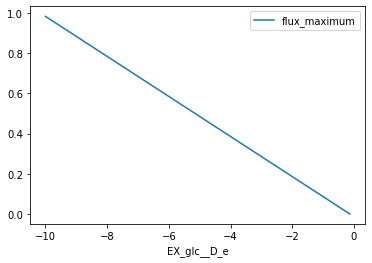

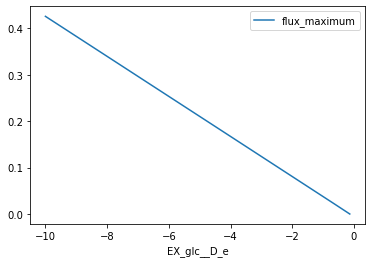

In [30]:
type(ppp_thca)
import matplotlib.pyplot as plt
ppp_gluc.plot(x="EX_glc__D_e", y="flux_maximum", kind="line")
ppp_thca.plot(x="EX_glc__D_e", y="flux_maximum", kind="line")

Finally, we can also use cameo

In [31]:
medium=model.medium
plotter = PlotlyPlotter()
growth = solution.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']
thc_production = model.optimize().objective_value
p = phenotypic_phase_plane(model, variables=['BIOMASS_Ec_iJO1366_core_53p95M'], objective='THCA_e')
p.plot(plotter, points=[(growth, thc_production)])

***
After computing the phenotypic phase plane we will explore the effect of different carbon sources on the theoretical maximum yield. This we will achieve by manually switching carbon sources and calculating the theoretical maximum yield.
***

***
## Medium optimization
In order to determine what effect the medium has on the maximum theoretical yield, the medium components have to be known first
***

In [32]:
model.medium

{'EX_cu2_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_mobd_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_slnt_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_cbl1_e': 0.01,
 'EX_cl_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0}

In [33]:
model.reactions.EX_glc__D_e

<Reaction EX_glc__D_e at 0x214ee53a850>

In [34]:

# Find all exchange reactions
exchange_reactions = [reaction for reaction in model.reactions if "EX_" in reaction.id]
extrac_reactions= []
# Print the IDs of exchange reactions
for reaction in exchange_reactions:
    print(reaction.id, reaction.name)



EX_cpgn_e Coprogen exchange
EX_crn_e L-Carnitine exchange
EX_cpgn_un_e Coprogen unloaded (no Fe(III)) exchange
EX_colipap_e Core oligosaccharide lipid A diphosphate exchange
EX_crn__D_e D-carnitine exchange
EX_12ppd__R_e (R)-Propane-1,2-diol exchange
EX_csn_e Cytosine exchange
EX_cu_e Cu+ exchange
EX_12ppd__S_e (S)-Propane-1,2-diol exchange
EX_cu2_e Cu2+ exchange
EX_glyc_e Glycerol exchange
EX_14glucan_e 1,4-alpha-D-glucan exchange
EX_glyc__R_e (R)-Glycerate exchange
EX_cyan_e Hydrogen cyanide exchange
EX_cynt_e Cyanate exchange
EX_glyc2p_e Glycerol 2-phosphate exchange
EX_cys__D_e D-Cysteine exchange
EX_glyc3p_e Glycerol 3-phosphate exchange
EX_15dap_e 1,5-Diaminopentane exchange
EX_glyclt_e Glycolate exchange
EX_cys__L_e L-Cysteine exchange
EX_cytd_e Cytidine exchange
EX_gmp_e GMP exchange
EX_dad_2_e Deoxyadenosine exchange
EX_23camp_e 2',3'-Cyclic AMP exchange
EX_damp_e DAMP exchange
EX_dca_e Decanoate (n-C10:0) exchange
EX_dcmp_e DCMP exchange
EX_dcyt_e Deoxycytidine exchange
EX_dd

***
The theoretical maxmimum yield using this standard medium is calculated as follows:
***

In [35]:
medium = model.medium
with model:
    THCA_production = model.optimize().objective_value
    print("Max. THC production [mmol gDW^-1 h^-1]:", THCA_production)
    print("Theoretical max. yield [mmol-THC / mmol-glc]:", THCA_production / (-1*model.reactions.EX_glc__D_e.flux))

Max. THC production [mmol gDW^-1 h^-1]: 0.42597906819716386
Theoretical max. yield [mmol-THC / mmol-glc]: 0.04259790681971638


***
Now we will switch carbon sources and recalculate the theoretical yield
***

In [36]:
c_sources = ['EX_glc__D_e' ,'EX_succ_e', 'EX_fru_e', 'EX_fum_e', 'EX_gln__L_e' , 'EX_glu__L_e', 'EX_glyc_e', 'EX_lac__D_e', 'EX_mal__D_e', 'EX_pyr_e' ]
c_names = [ 'glucose', 'succinate' , 'fructose', 'fumarate', 'glutamine', 'glutamate', 'glycerol', 'lactate', 'malate', 'pyruvate'  ]
time= [0,1,2,3,4,5,6,7,8,9]
for t in time:
    medium = model.medium
    with model: 
            medium['EX_glc__D_e'] = 0
            medium[c_sources[t]] = 10
            model.medium = medium
            solution = model.optimize()
            thc_production = model.optimize().objective_value
            react= model.reactions.get_by_id(c_sources[t])
            print('The THC production using {} as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(c_names[t], thc_production))
            print('yield is equal to ' + str(thc_production / (-1* react.flux)) + ' mmol / mmol {}'.format(c_names[t]) )
            model.objective = model.reactions.BIOMASS_Ec_iJO1366_core_53p95M
            solution = model.optimize()
            biomass_production = model.optimize().objective_value
            print('The biomass production using {} as a primary carbon source yields {:.2f} mmol/ gDw*h \n'.format(c_names[t], biomass_production))




The THC production using glucose as a primary carbon source yields 0.43 mmol/ gDw*h
yield is equal to 0.04259790681971641 mmol / mmol glucose


The biomass production using glucose as a primary carbon source yields 0.98 mmol/ gDw*h 

The THC production using succinate as a primary carbon source yields 0.22 mmol/ gDw*h
yield is equal to 0.022104813443463392 mmol / mmol succinate
The biomass production using succinate as a primary carbon source yields 0.51 mmol/ gDw*h 

The THC production using fructose as a primary carbon source yields 0.42 mmol/ gDw*h
yield is equal to 0.04238095238095258 mmol / mmol fructose
The biomass production using fructose as a primary carbon source yields 0.98 mmol/ gDw*h 

The THC production using fumarate as a primary carbon source yields 0.20 mmol/ gDw*h
yield is equal to 0.01954144118484764 mmol / mmol fumarate
The biomass production using fumarate as a primary carbon source yields 0.45 mmol/ gDw*h 

The THC production using glutamine as a primary carbon source yields 0.30 mmol/ gDw*h
yield is equal to 0.02996875813590209 mmol / mmol glutamine
The biomass production using glutamine as a primary car

Phenotypic phase plane (flux)

***
## OptGene
***
We will now try and find target genes to optimize the cell factory using the OptGene algorithm

In [37]:

medium=model.medium
optgene = OptGene(model)

result = optgene.run(target=model.reactions.THCA_e, 
                     biomass=model.reactions.BIOMASS_Ec_iJO1366_core_53p95M,
                     substrate=model.metabolites.g1p_e,
                     max_evaluations=20000, population_size=200, max_knockouts=3,
                     plot=False, growth_coupled=False)

result

Starting optimization at Thu, 09 Nov 2023 20:36:21


c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 1), ('y', 0)



HBox()

c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 2), ('y', 1)

c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 3), ('y', 2)

c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 4), ('y', 3)

c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 5), ('y', 4)

c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 6), ('y', 5)

c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarn

Finished after 00:16:44


***
The OptGene results show that there are no targets available to optimize THC production
***

***
## OptKnock
***
We will now use OptKnock to try and find target reactions that can be knocked out in order to increase THC yield

c:\Users\Lukas\anaconda3\lib\site-packages\cameo\strain_design\deterministic\linear_programming.py:118: UserWarning:

You are trying to run OptKnock with glpk_interface. This might not end well.




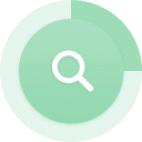

<IPython.core.display.Javascript object>

In [38]:

optknock = OptKnock(model, fraction_of_optimum=0.1)
result = optknock.run(max_knockouts=1, target="THCA_e", biomass="BIOMASS_Ec_iJO1366_core_53p95M")




In [39]:
result

HBox()

In [40]:
result.plot(plotter, 0)

Cofactor swap targets

In [41]:


model.solver = "glpk"
biomass = model.reactions.BIOMASS_Ec_iJO1366_core_53p95M
biomass.lower_bound = 0.1
demand = model.reactions.THCA_e
model.objective = demand

product_yield = product_yield(demand, model.reactions.EX_glc__D_e)

CofactorSwapOptimization?

swap_opt = CofactorSwapOptimization(model=model, objective_function=product_yield, plot=True, cofactor_id_swaps=(['GAPD', 'GAPDH'], ['NAD', 'NADH']))

result = swap_opt.run(max_size=5)

result

KeyError: 'GAPD'

Init signature:
CofactorSwapOptimization(
    cofactor_id_swaps=(['nad_c', 'nadh_c'], ['nadp_c', 'nadph_c']),
    candidate_reactions=None,
    skip_reactions=None,
    *args,
    **kwargs,
)
Docstring:     
Optimize co-factor swapping

As suggested in [1]_, flux through a given reaction can sometimes be optimized by swapping complementary
co-factor. This class implements a search for reactions when swapped improve the given objective. Briefly,
the approach is to

- find reactions that have all the targeted co-factor pairs e.g. (nad_c -> nadp_c, nadh_c -> nadph_c)

- add reactions that have the co-factors swapped and then by a search algorithm switching one off in favor of the
  other

The implementation here differs from that in [1]_ in that we use a general purpose search algorithm rather than
formulating the search as a mixed integer linear programming problem.

References
----------
.. [1] King, Zachary A., and Adam M. Feist. "Optimizing Cofactor Specificity of Oxidoreductase Enzym

In [ ]:
result

## Flux Scanning based on Objective  Flux

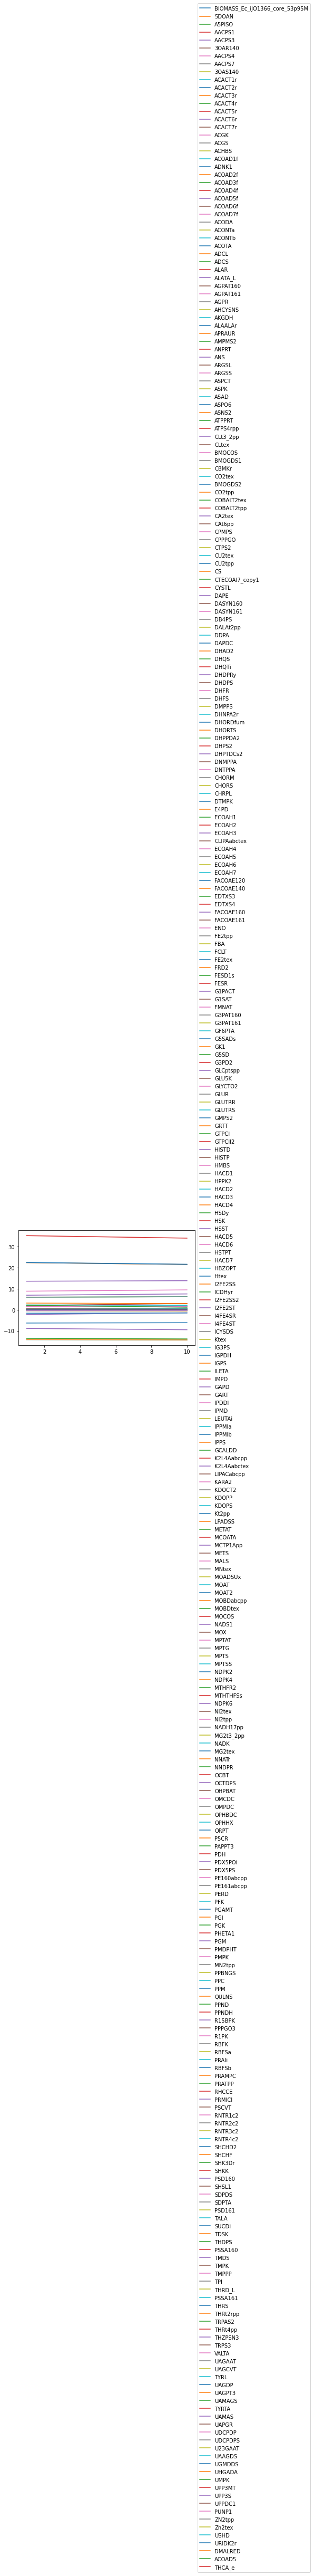

In [ ]:
fseof = FSEOF(model)
result= fseof.run(target=model.reactions.THCA_e)
df = result.data_frame

result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)
 

# removing genes from dataframe 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df.head()

1          2          3          4          5          6   \
ATPS4rpp  35.252640  35.122293  34.991946  34.861600  34.731253  34.600907   
SUCDi     22.513666  22.419652  22.325639  22.231625  22.137612  22.043598   
FRD2      22.423450  22.326922  22.230393  22.133865  22.037337  21.940809   
NADH17pp  22.423450  22.326922  22.230393  22.133865  22.037337  21.940809   
GAPD      13.590510  13.617969  13.645427  13.672885  13.700344  13.727802   

                 7          8          9          10  
ATPS4rpp  34.470560  34.340213  34.209867  34.079520  
SUCDi     21.949585  21.855571  21.761558  21.667544  
FRD2      21.844280  21.747752  21.651224  21.554696  
NADH17pp  21.844280  21.747752  21.651224  21.554696  
GAPD      13.755260  13.782719  13.810177  13.837635

Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

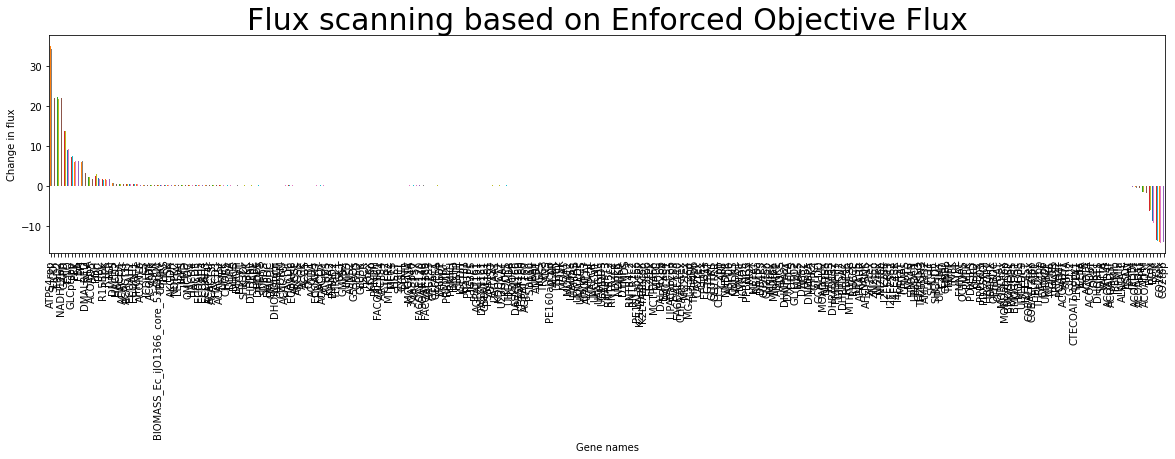

In [ ]:
def bar_color(df,color1,color2):
    return np.where(df.values >=0,color1,color2).T

fig = df.plot(legend=None, kind='bar',figsize=(20, 4), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [ ]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]
target_reactions_df

1         2         3         4         5         6         7  \
PDH      2.081446  2.186362  2.291278  2.396194  2.501110  2.606025  2.710941   
PGI      1.421555  1.479920  1.538285  1.596651  1.655016  1.713381  1.771746   
HACD2    0.425366  0.437404  0.449443  0.461482  0.473521  0.485560  0.497599   
HACD1    0.425366  0.437404  0.449443  0.461482  0.473521  0.485560  0.497599   
ACACT2r  0.425366  0.437404  0.449443  0.461482  0.473521  0.485560  0.497599   
...           ...       ...       ...       ...       ...       ...       ...   
ALATA_L -0.061247 -0.062955 -0.064662 -0.066369 -0.068076 -0.069784 -0.071491   
HSDy    -0.073550 -0.075600 -0.077650 -0.079700 -0.081750 -0.083800 -0.085850   
ASAD    -0.112630 -0.115769 -0.118909 -0.122048 -0.125188 -0.128327 -0.131467   
ACOAD2f -0.425366 -0.437404 -0.449443 -0.461482 -0.473521 -0.485560 -0.497599   
ACOAD1f -0.425366 -0.437404 -0.449443 -0.461482 -0.473521 -0.485560 -0.497599   

                8         9        10  relative_change_in_flux  
PDH      2.815857  2.920773  3.025688                 1.312075  
PGI      1.830112  1.888477  1.946842                 1.269815  
HACD2    0.509638  0.521677  0.533716                 1.203011  
HACD1    0.509638  0.521677  0.533716                 1.203011  
ACACT2r  0.509638  0.521677  0.533716                 1.203011  
...           ...       ...       ...                      ...  
ALATA_L -0.073198 -0.074905 -0.076612                 1.200556  
HSDy    -0.087900 -0.089951 -0.092001                 1.200552  
ASAD    -0.134606 -0.137746 -0.140885                 1.200554  
ACOAD2f -0.509638 -0.521677 -0.533716                 1.203011  
ACOAD1f -0.509638 -0.521677 -0.533716                 1.203011  

[268 rows x 11 columns]

In [ ]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

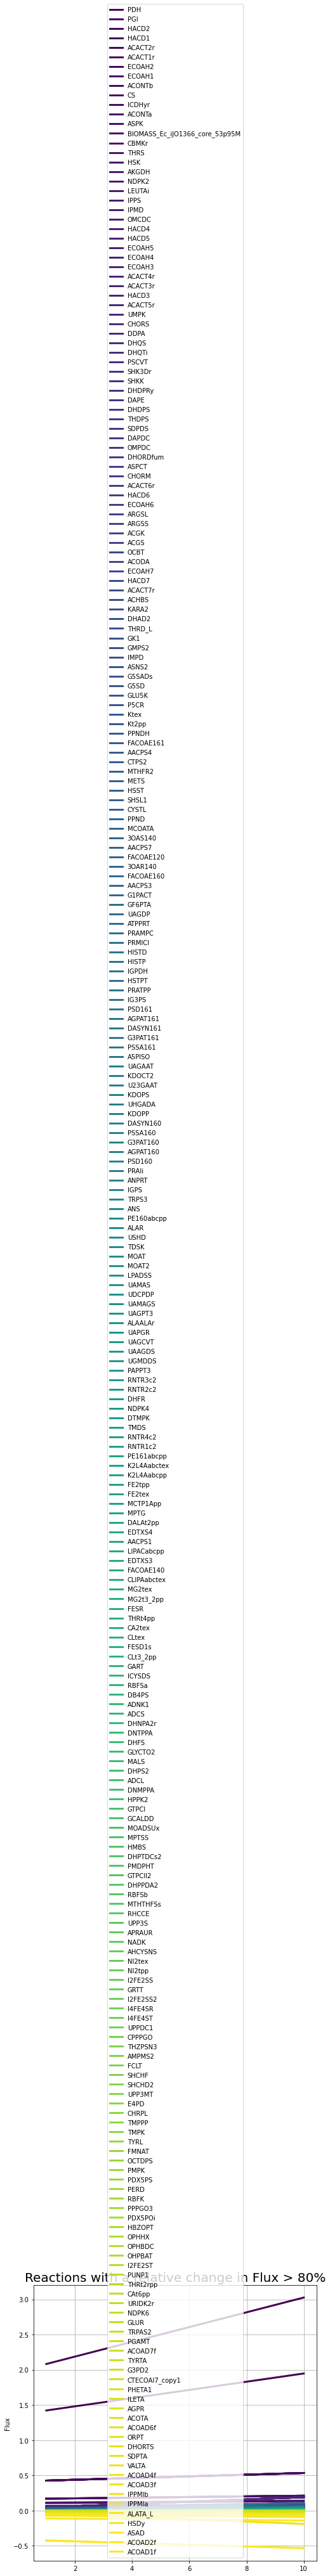

In [ ]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

Dynamic flux based analysis

In [ ]:
from dfba import DfbaModel, ExchangeFlux, KineticVariable
from dfba.plot.matplotlib import *

model.objective = model.reactions.THCA_e
model.optimize();

model.solver = "glpk"
dfba_model = DfbaModel(model)


X = KineticVariable("Biomass")
Glc = KineticVariable("Glucose")
Psi = KineticVariable("Psilocybin")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, Glc, Psi, Oxy])


mu = ExchangeFlux("DRAIN_Biomass")
v_G = ExchangeFlux("BOUNDARY_GLCe")
v_Psi = ExchangeFlux("psiM")
v_O = ExchangeFlux("BOUNDARY_O2e")

dfba_model.add_exchange_fluxes([mu, v_G, v_Psi, v_O])


dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * 180.1559/1000 * X)
dfba_model.add_rhs_expression("Psilocybin", v_Psi * 284.25/1000.0 * X)
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant

dfba_model.add_exchange_flux_lb("BOUNDARY_GLCe", 2.5 * (Glc / (0.0027 + Glc)), Glc)
dfba_model.add_exchange_flux_lb("BOUNDARY_O2e", 15.0 * (Oxy / (0.024 + Oxy)), Oxy)
dfba_model.add_exchange_flux_lb("psiM", 0.7 * (Psi / (0.3 + Psi)), Psi)       #Guesstimates based on trp


with model:
    dfba_model.add_initial_conditions({"Biomass": 1, "Glucose": 20.0, "Psilocybin": 0.0, "Oxygen": 39})
    concentrations, trajectories = dfba_model.simulate(0.0, 1000.0, 0.1, ["BOUNDARY_GLCe", "psiM"])


plot_concentrations(concentrations)

plot_trajectories(trajectories)





ModuleNotFoundError: No module named 'dfba'

In [ ]:
from cobra.manipulation.delete import find_gene_knockout_reactions


In [ ]:
cd Desktop/my_project